In [1]:
import pandas as pd
import nltk
import re
from pyvi import ViTokenizer
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('data.csv')
df.head(3)

,Title,Summary,Content
0,Các nước chia buồn vụ tai nạn máy bay của Ai C...,"Anh, Pháp, Hy Lạp, NATO đều đề nghị giúp đỡ Ai...",Tổng thư ký Tổ chức Hiệp ước Bắc Đại Tây Dương...
1,Máy bay Ai Cập rơi: Những câu hỏi cho chính ph...,Có những câu hỏi đặt ra cho cả chính phủ Pháp ...,Chiếc Airbus A320-232 số hiệu MS804 của hãng h...
2,Giải mã bí ẩn máy bay rơi của EgyptAir\n,Vị trí chiếc máy bay xấu số MS804 đã được phát...,"Phó Chủ tịch EgyptAir, ông Ahmed Adel, không l..."


In [3]:
df.isnull().sum()

Title      1
Summary    0
Content    0
dtype: int64

In [4]:
with open('G:/My Drive/PBL6/vietnamese.txt', 'r', encoding = 'utf-8') as file:
    stopwords = file.read().splitlines()

In [5]:
#delete numbers
def delete_numbers(text):
    return re.sub(r'\d+', ' ', text)
#lower case
def lower(text):
    return text.lower()
#delete special characters
def remove_special_characters(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!–"#$%&'()*+,،-./:;<=>؟?@[\]^`{|}~“”…"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()
#delete stop words
def remove_stopwords(text):
    words = text.split()
    mean_word = [word for word in words if word not in stopwords]
    mean_text = " ".join(mean_word)
    return mean_text
def preprocess(text):
    text = delete_numbers(text)
    text = lower(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text
def tokenizer(text):
    return ViTokenizer.tokenize(text)

In [6]:
df['Tokenizer_Content'] = df['Content'].apply(tokenizer)
df['Clean_Content'] = df['Tokenizer_Content'].apply(preprocess)

In [7]:
df.head(3)

,Title,Summary,Content,Tokenizer_Content,Clean_Content
0,Các nước chia buồn vụ tai nạn máy bay của Ai C...,"Anh, Pháp, Hy Lạp, NATO đều đề nghị giúp đỡ Ai...",Tổng thư ký Tổ chức Hiệp ước Bắc Đại Tây Dương...,Tổng_thư_ký Tổ_chức Hiệp_ước Bắc_Đại_Tây_Dương...,tổng_thư_ký tổ_chức hiệp_ước bắc_đại_tây_dương...
1,Máy bay Ai Cập rơi: Những câu hỏi cho chính ph...,Có những câu hỏi đặt ra cho cả chính phủ Pháp ...,Chiếc Airbus A320-232 số hiệu MS804 của hãng h...,Chiếc Airbus A320 - 232 số_hiệu MS804 của hãng...,airbus a số_hiệu ms hãng hàng egyptair khởi_hà...
2,Giải mã bí ẩn máy bay rơi của EgyptAir\n,Vị trí chiếc máy bay xấu số MS804 đã được phát...,"Phó Chủ tịch EgyptAir, ông Ahmed Adel, không l...","Phó_Chủ_tịch EgyptAir , ông Ahmed_Adel , không...",phó_chủ_tịch egyptair ahmed_adel loại_trừ khả_...


In [8]:
# Top common words column
def top_count_column(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x: str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words', 'count']

    # Visualization
    plt.figure(figsize=(12, 8))
    plt.barh(temp['Common_words'][::-1], temp['count'][::-1], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Common Words')
    plt.title('Top 20 Common Words')
    plt.show()
def top_count(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x:str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(50))
    temp.columns = ['Common_words','Count']
    temp.style.background_gradient(cmap='Blues')
    return temp

In [9]:
top_count = top_count("Clean_Content")
top_count.style.background_gradient(cmap='Blues')

,Common_words,Count
0,xe,1593
1,tp,1538
2,việt_nam,1405
3,đi,1371
4,hai,1327
5,tỉnh,1220
6,công_an,1146
7,đồng,1104
8,công_ty,1086
9,dân,1041


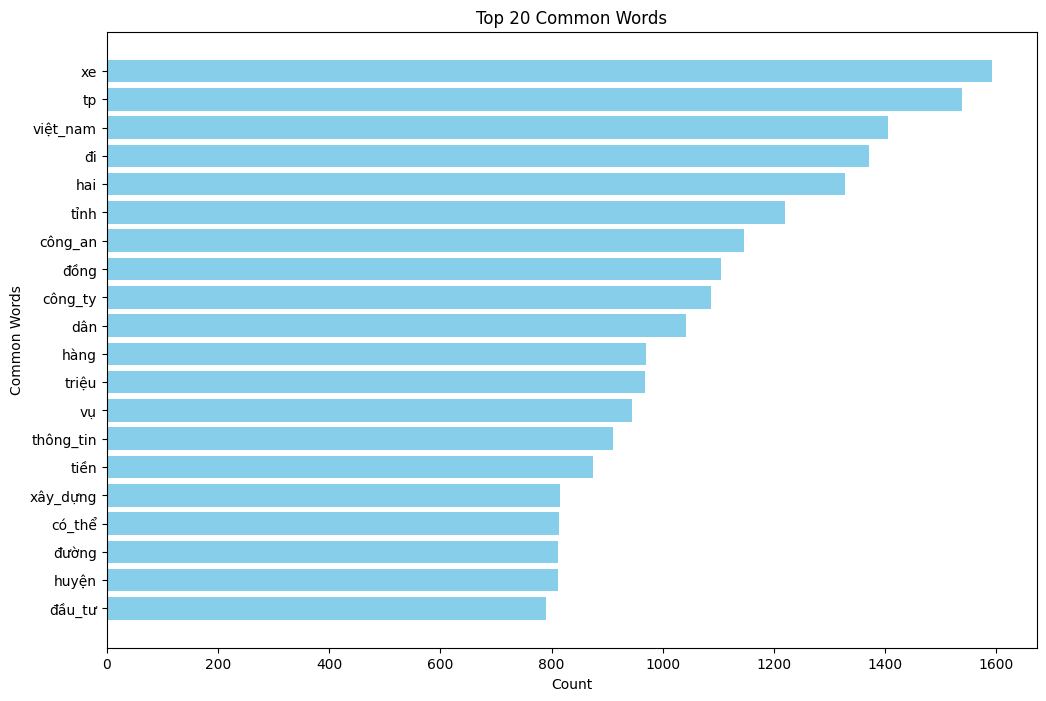

In [10]:
top_count_column('Clean_Content')

In [11]:
def word_cloud(df):
    plt.subplots(figsize=(20, 10))

    wordcloud = WordCloud (
                        background_color = 'white',
                        width = 512,
                        height = 384
                            ).generate(' '.join(df))
    plt.imshow(wordcloud) # image show
    plt.axis('off') # to off the axis of x and y
    plt.savefig('Plotly_World_Cloud.png')
    plt.show()
    

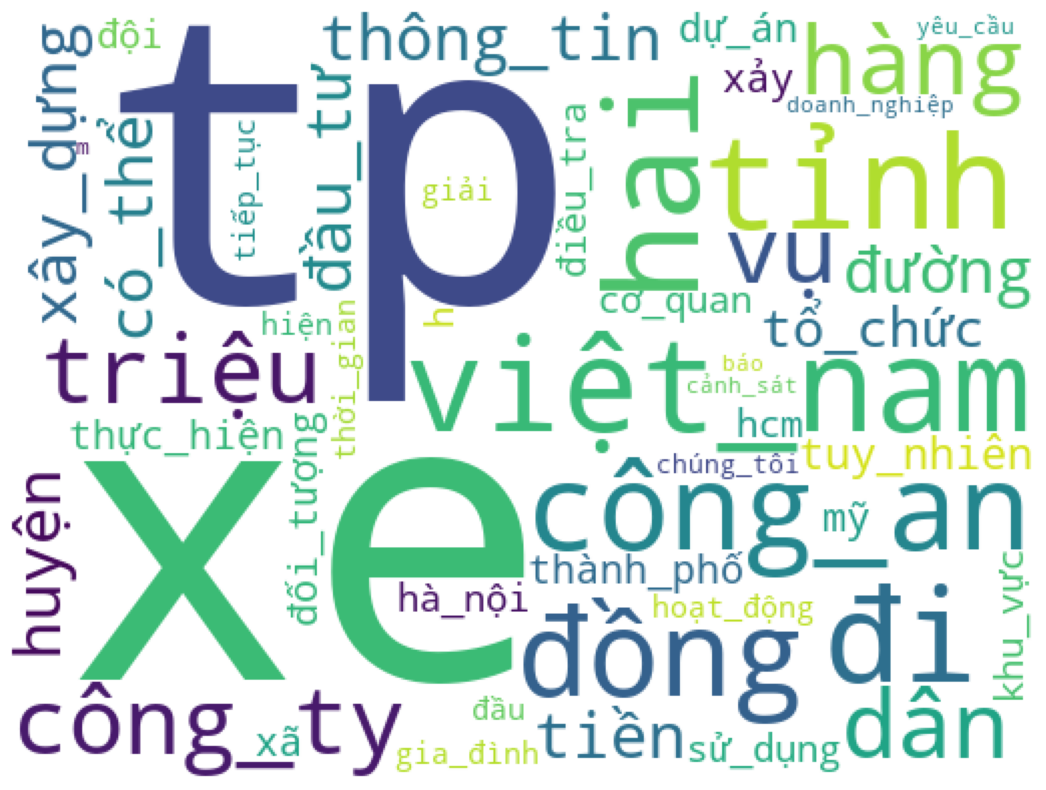

In [12]:
word_cloud(top_count['Common_words'])

# **Model**



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from keras.models import Model
from keras.callbacks import EarlyStopping

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModel.from_pretrained("vinai/phobert-base")

In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()
